<center><h1>Lesson 1: What is your PET?</h1></center>

<h2>Imports</h2>

The following commands in the below given tabs are called magics.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Our first application deals with **computer vision** so we will import the  _`fastai.vision`_ module which sits on top of the **PyTorch** _Deep Learning Framework_ and has various functionalities which we will slowly explore. 

In [0]:
from fastai import *
from fastai.vision import *


<h2>Lets check our DATA</h2>

Our dataset contains **12 cat breeds** and **25 dog breeds**. Our model will need to differentiate between these **_37_** distinct categories. 

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



The _untar__data_ function resides inside the **fastai.datasets** module and is used to get the dataset from the links and then _untar/unzip_ the data.


This type of classification which contains high number of **distinct** articles or types is called **high grained classification**

In [0]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

Taking a look at the data means understanding how the data directories are sturctured, what the labels are and what some sample images look like. 

The main difference between the handling of image classification datasets is the way the **labels** are stored. In this particular dataset, labels are stored in the filenames themselves.

We will need to extract them to be able to classify the images into the correct categories. 

In the _fastai_ library we have a function called **_ImageDataBunch.from__name__re_** which gets the labels from the filenames using regular expression.

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_156.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_138.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_137.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_46.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size = 224) # size of images we want to work with
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category keeshond, Category japanese_chin, Category japanese_chin, Category British_Shorthair, Category Persian]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 480, 320), Image (3, 500, 375), Image (3, 500, 333), Image (3, 333, 500), Image (3, 375, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category pug, Category keeshond, Category beagle, Category chihuahua, Category newfoundland]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 333, 500), Image (3, 455, 500), Image (3, 333, 500), Image (3, 300, 199), Image (3, 333, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

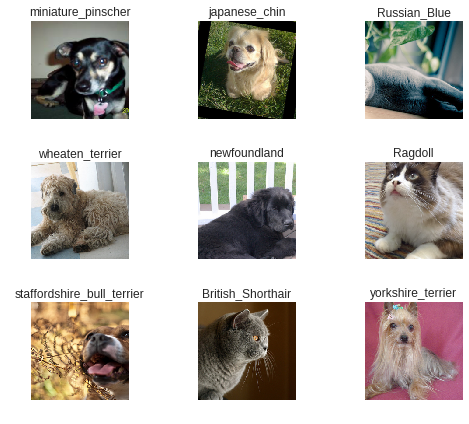

In [0]:
data.show_batch(rows = 3, figsize=(7,6))

In [0]:
type(data)

fastai.vision.data.ImageDataBunch

In [0]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

<h2>Training resnet34</h2>

Here we will be training our model. We will use a _convolutional neural network_ backbone and a fully connected head with a single hidden layer as a classifier. 


For now the only thing we know about the model is that it will take the images as inputs and will output the predicted probability for each categories. 

In [0]:
from fastai.metrics import error_rate

In [0]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 97078673.66it/s]


The video has **ConvLearner** but it is replaced by **_create__cnn_** in the new commit.

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.366717,0.320530,0.092693
2,0.547364,0.272375,0.090663
3,0.333178,0.210840,0.066982
4,0.255868,0.203436,0.062923


In [0]:
learn.save('stage-1')

<h2>Results</h2>

Here we will see what came out of the model and for which categories the model got confused. In this case the mistakes loop resonable. This is an indicator that our classifier is working correctly. 

When we plot the confusion matrix we will  observe that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses the other categories. 


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

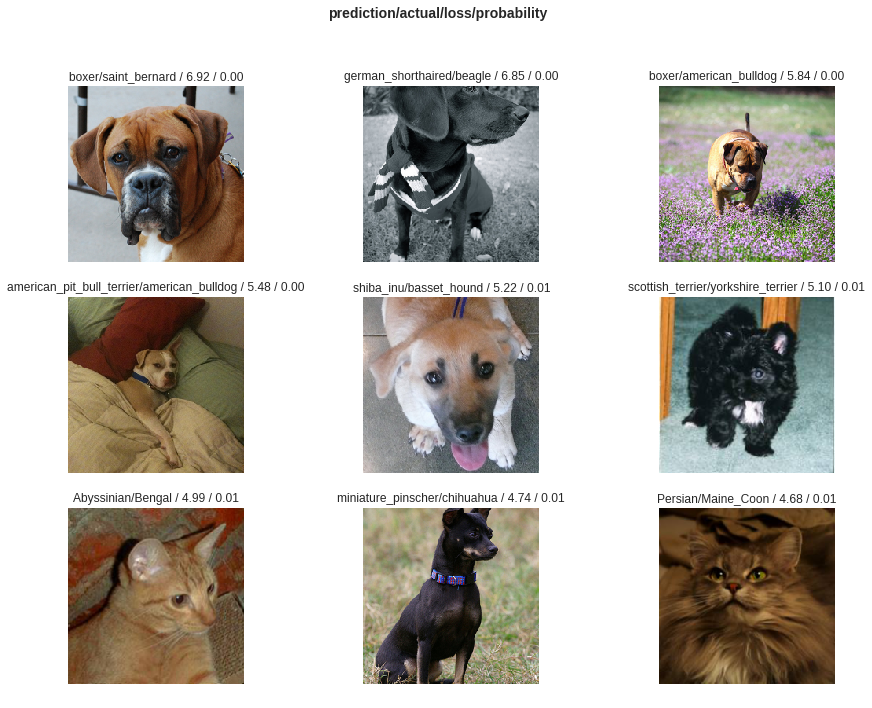

In [0]:
interp.plot_top_losses(9, figsize=(15, 11))

**Loss**: The things that we were most confident about got wrong.

In [0]:
doc(interp.plot_top_losses)

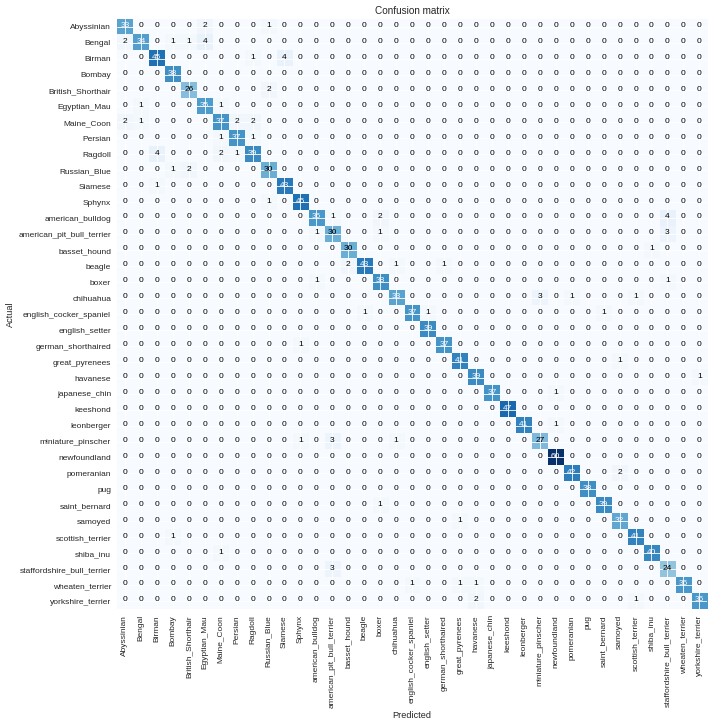

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [0]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Siamese', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

The **_most__confused_** will take an argument _min__val_ and will give out for which categories the model got confused. 

From the above example we have our model predicting a breed to be **_Bengal_** but it was **_Egyptian__Mau_** and the model got this wrong for nearly 4 times. 

Thus when we have a huge number of categories for classification we can use the **_most__confused_** function to get what the model is getting wrong and how many times. 

<h2>Unfreezing, fine-tuning, and learning rates</h2>

Our model is working perfectly we will _unfreeze_ our model and trian some more. 

In [0]:
learn.unfreeze()

**_unfreeze_** tells the code to train the full model.


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.583260,0.300709,0.092016


Now we literally broke the model. 

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category keeshond, Category japanese_chin, Category japanese_chin, Category British_Shorthair, Category Persian]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 480, 320), Image (3, 500, 375), Image (3, 500, 333), Image (3, 333, 500), Image (3, 375, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category pug, Category keeshond, Category beagle, Category chihuahua, Category newfoundland]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 333, 500), Image (3, 455, 500), Image (3, 333, 500), Image (3, 300, 199), Image (3, 333, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


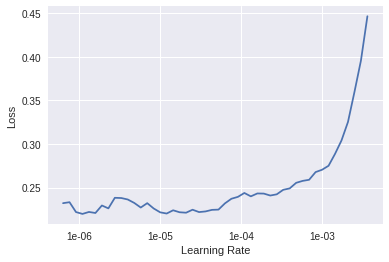

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.229143,0.202185,0.064953
2,0.203818,0.193030,0.061570


We pass a range of learning rates using **max_lr: slice(start-value, stop-value)**,  which tells the model that _**train the first layers on 1e-6?**_ and the _**last layers on 1e-4**_ and distribute the other layer between the two numbers.  

<h2>Training: resnet50</h2>

_**resnet50**_ has a 50 residual layer network.

Basically, _**resnet50**_ usually performs better because it is deeper with more parameters. 

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category keeshond, Category japanese_chin, Category japanese_chin, Category wheaten_terrier, Category Maine_Coon]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 480, 320), Image (3, 500, 375), Image (3, 500, 333), Image (3, 375, 500), Image (3, 355, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category american_bulldog, Category saint_bernard, Category miniature_pinscher, Category leonberger, Category Sphynx]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 334), Image (3, 333, 500), Image (3, 150, 200), Image (3, 333, 500), Image (3, 224, 300)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


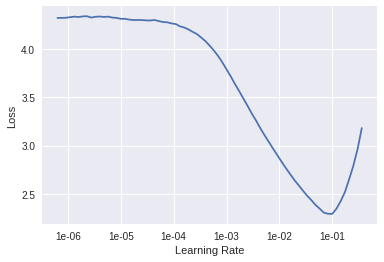

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.921172,0.298146,0.100135
2,0.429330,0.227260,0.066982
3,0.297234,0.193841,0.069689
4,0.201729,0.168521,0.050744
5,0.150383,0.164108,0.050068


In [0]:
learn.save('stage-1-r50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.125027,0.165116,0.049391


In [0]:
learn.load('stage-1-r50')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category keeshond, Category japanese_chin, Category japanese_chin, Category wheaten_terrier, Category Maine_Coon]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 480, 320), Image (3, 500, 375), Image (3, 500, 333), Image (3, 375, 500), Image (3, 355, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category american_bulldog, Category saint_bernard, Category miniature_pinscher, Category leonberger, Category Sphynx]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 334), Image (3, 333, 500), Image (3, 150, 200), Image (3, 333, 500), Image (3, 224, 300)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Ragdoll', 'Persian', 3),
 ('Siamese', 'Birman', 3)]

<h2>Other Data formats</h2>

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

The below given data read format is for datasets which store images inside a folder with folder name as label. 

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

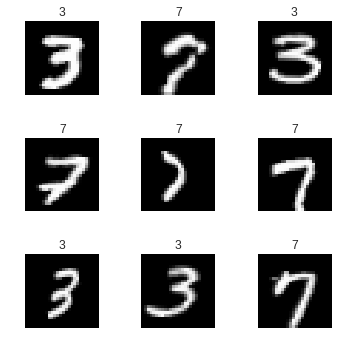

In [0]:
data.show_batch(rows = 3, figsize = (5,5))

In [0]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [0]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy
1,0.163938,0.082295,0.972522
2,0.093124,0.044977,0.983808


The below given example is when we have a _.csv_ file which contains all the labels. We can use _from_csv_ method where in we pass the name of the _.csv_ file and if the name is _**labels.csv**_ we don't need to pass the name along with the _path_ only _path_ will do.

In [0]:
df = pd.read_csv(path/'labels.csv')

In [0]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

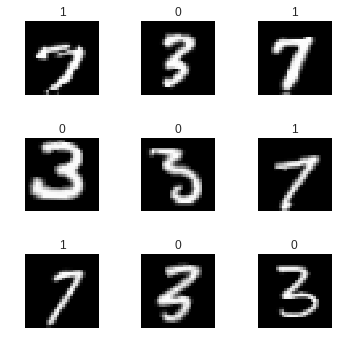

In [0]:
data.show_batch(rows = 3, figsize = (5,5))

In [0]:
data.classes

[0, 1]

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms = tfms, size = 24)

In [0]:
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms = tfms, size = 24)
data.classes

['3', '7']

For the next example we have the labels from the file names but the pattern is different so we can use _from__name__func_ method and then inside the argument **label_func** we can pass a _lambda_ function. 

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms = tfms, size = 24, label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

or, we could create a list of lables and use the _from__list_ method and pass in the file path and give the _labels_ to the **label** argument.  

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [68]:
data = ImageDataBunch.from_lists(path, fn_paths, labels = labels, ds_tfms = tfms, size = 24)
data.classes

['3', '7']